In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import regex as re
from nltk.corpus import stopwords
from keras.models import model_from_json
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Flatten, Dense, Softmax, Dropout
import matplotlib.pyplot as plt

In [8]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]',' ',text)
    text = re.sub("\d+", " ", text)
    stop = stopwords.words('english')
    text = " ".join(text for text in text.split() if text not in stop)
    return text

In [9]:
movie = pd.read_csv('E:\Crawl_Web\Rotten Tomatoes\Info film\Movie\movie_info.csv')

In [10]:
movie = movie[['Genre', 'Synopsis']].dropna().reset_index(drop=True)

In [11]:
# Tiền xử lí dữ liệu text
for i in range(len(movie)):
    movie['Synopsis'].iloc[i] = preprocess(movie['Synopsis'].iloc[i])

In [12]:
list_genre = []
for g in movie['Genre']:
    try:
        g = g.split(', ')
        for sub_g in g:
            if sub_g not in list_genre:
                list_genre.append(sub_g)
    except:
        continue

In [13]:
for g in list_genre:
    movie[g] = 0

for i in range(len(movie)):
    genre = movie['Genre'].iloc[i]
    for g in list_genre:
        if g in genre:
            movie[g].iloc[i] = 1

C:\Users\Nguyen Quang Tu\AppData\Local\Temp\ipykernel_3336\2218344769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[g].iloc[i] = 1


In [14]:
movie.shape

(32559, 38)

In [15]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

# Xây mô hình

In [ ]:
def eval_plot(history):
    plt.subplot(221)
    plt.title("Accuracy")
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.legend()
    plt.subplot(222)
    plt.title("Loss")
    plt.plot(history.history['loss'], label='loss')
    plt.legend()
    plt.subplot(223)
    plt.title("Accuracy")
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.subplot(224)
    plt.title("Loss")
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

Predict Entertainment
Epoch 1/10
814/814 [==============================] - 103s 125ms/step - loss: 0.0433 - accuracy: 0.9901 - val_loss: 3.6390e-04 - val_accuracy: 1.0000
Epoch 2/10
814/814 [==============================] - 89s 109ms/step - loss: 7.7008e-04 - accuracy: 1.0000 - val_loss: 1.4545e-04 - val_accuracy: 1.0000
Epoch 3/10
814/814 [==============================] - 90s 110ms/step - loss: 6.3549e-04 - accuracy: 1.0000 - val_loss: 7.8675e-05 - val_accuracy: 1.0000


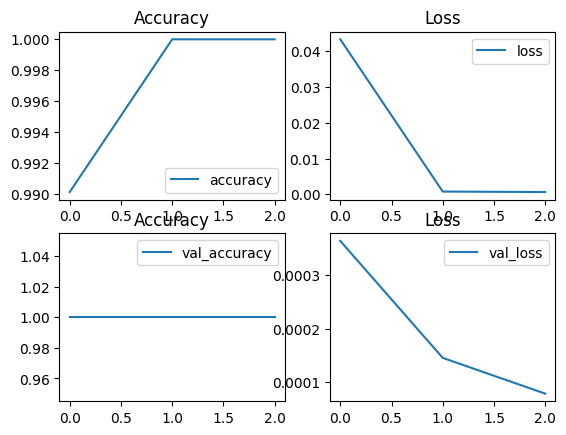

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Predict News
Epoch 1/10
814/814 [==============================] - 104s 126ms/step - loss: 0.0291 - accuracy: 0.9945 - val_loss: 2.7805e-04 - val_accuracy: 1.0000
Epoch 2/10
814/814 [==============================] - 92s 112ms/step - loss: 7.2840e-04 - accuracy: 1.0000 - val_loss: 1.0864e-04 - val_accuracy: 1.0000
Epoch 3/10
814/814 [==============================] - 90s 111ms/step - loss: 5.5281e-04 - accuracy: 1.0000 - val_loss: 5.8014e-05 - val_accuracy: 1.0000


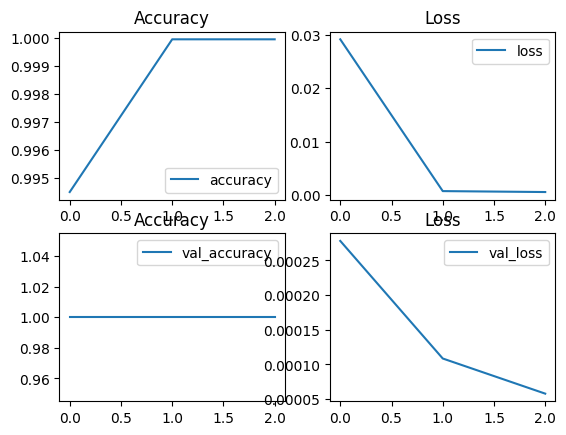

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Predict Other
Epoch 1/10
814/814 [==============================] - 100s 120ms/step - loss: 0.0349 - accuracy: 0.9929 - val_loss: 0.0038 - val_accuracy: 0.9997
Epoch 2/10
814/814 [==============================] - 90s 111ms/step - loss: 2.8154e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9997
Epoch 3/10
814/814 [==============================] - 90s 111ms/step - loss: 1.2098e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9997


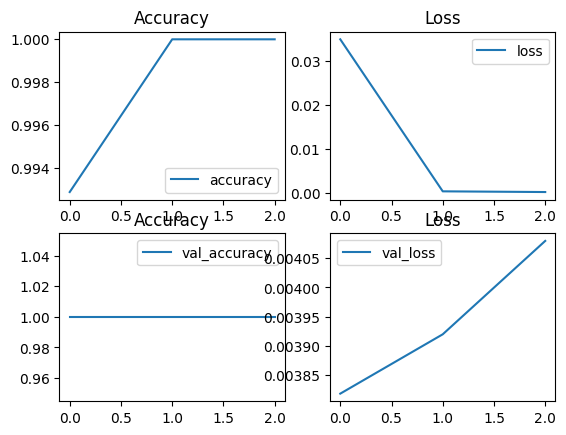

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Predict Gay & lesbian
Epoch 1/10
814/814 [==============================] - 102s 123ms/step - loss: 0.0217 - accuracy: 0.9966 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 2/10
814/814 [==============================] - 90s 111ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 0.9998
Epoch 3/10
814/814 [==============================] - 90s 111ms/step - loss: 9.1944e-04 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 0.9998


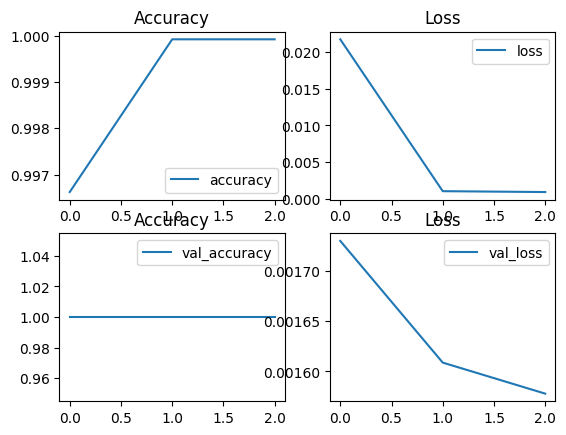

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Predict Health & wellness
Epoch 1/10
814/814 [==============================] - 98s 118ms/step - loss: 0.0303 - accuracy: 0.9940 - val_loss: 2.1544e-04 - val_accuracy: 1.0000
Epoch 2/10
814/814 [==============================] - 90s 110ms/step - loss: 6.5337e-04 - accuracy: 1.0000 - val_loss: 1.0718e-04 - val_accuracy: 1.0000
Epoch 3/10
814/814 [==============================] - 90s 110ms/step - loss: 5.7016e-04 - accuracy: 1.0000 - val_loss: 6.1309e-05 - val_accuracy: 1.0000


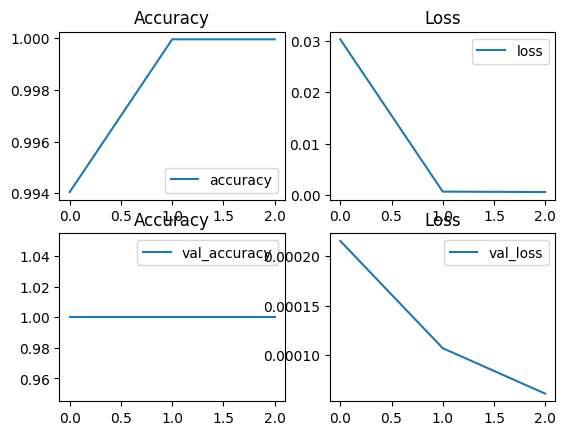

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
for genre in list_genre[31:]:
    print('Predict ' + genre)
    # Chia bộ train và test (80:20)
    x_train, x_test, y_train, y_test = train_test_split(movie['Synopsis'].values, movie[genre].values, test_size = 0.2, random_state = 0)

    # Vectorizer
    vectorizer = TfidfVectorizer()
    features = vectorizer.fit_transform(x_train) # Bộ train
    features_test = vectorizer.transform(x_test) # Bộ valid

    # Neural Network model
    model = Sequential()
    model.add(Dense(256, input_shape = (features.shape[1],), activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'sigmoid'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(19))
    model.add(Softmax())

    model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.2, patience=2, restore_best_weights=True)

    history = model.fit(features.todense(), y_train, validation_data = (features_test.todense(), y_test), epochs = 10, callbacks=[callback])

    # Đánh giá mô hình
    eval_plot(history)

    # Lưu mô hình
    model_json = model.to_json()

    with open("predict_genre_%s.json" %genre, "w") as json_file:
        json_file.write(model_json)

    model.save_weights("predict_genre_%s.h5" %genre)

    print('-'*100)
    print('-'*100)

In [ ]:
len(list_genre)

36

In [ ]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

# Load Model

In [ ]:
json_file = open('predict_genre_Drama.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("predict_genre_Drama.h5")

In [ ]:
t = """17-year-old Suzume's journey begins in a quiet town in Kyushu when she encounters a young man who tells her, "I'm looking for a door." What Suzume finds is a single weathered door standing upright in the midst of ruins as though it was shielded from whatever catastrophe struck. Seemingly drawn by its power, Suzume reaches for the knob.... Doors begin to open one after another all across Japan, unleashing destruction upon any who are near. Suzume must close these portals to prevent further disaster. The stars. The sunset. The morning sky. Within that realm, it was as though all time had melted together in the sky--guided by these mysterious doors, Suzume's journey to close doors is about to begin."""

t = vectorizer.transform([preprocess(t)])
np.argmax(loaded_model.predict(t.todense()),axis=1)

1/1 [==============================] - 0s 24ms/step


array([0], dtype=int64)